In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

In [2]:
data = pd.read_pickle('../lesson1/prepared_dataframe.pkl')
data.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemm
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


### 1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
    Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
    Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
    Исключим стоп-слова с помощью stop_words='english'. 
    Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [3]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)

### Применим CountVectorizer

In [4]:
bag_of_words_st = count_vectorizer.fit_transform(data.tweet_stemmed.map(' '.join))
feature_names_cv = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words_st.toarray(), columns = feature_names_cv)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bag_of_words_lem = count_vectorizer.fit_transform(data.tweet_lemm.map(' '.join))
# feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words_lem.toarray(), columns = feature_names_cv)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
    Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
    Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
    Исключим стоп-слова с помощью stop_words='english'.
    Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)

### Применим TfidfVectorizer

In [7]:
bag_of_words_st2 = tfidf_vectorizer.fit_transform(data.tweet_stemmed.map(' '.join))
feature_names_tf = tfidf_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words_st2.toarray(), columns = feature_names_tf)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [8]:
bag_of_words_lem2 = tfidf_vectorizer.fit_transform(data.tweet_stemmed.map(' '.join))
# feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words_lem2.toarray(), columns = feature_names_tf)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


### 3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте в таблицу метод векторизации и скор, который вы получили (в методах векторизации поизменяйте параметры чтобы добиться лучшего скора), обратите внимание, как падает/растёт скор при уменьшении количества фичей, и изменении параметров, также попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [9]:
result = pd.DataFrame()
accuracy = []

In [10]:
corpus = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(corpus.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [11]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

### Применим CountVectorizer

In [12]:
count_vectorizer.fit(trainDF['text'])

xtrain_count =  count_vectorizer.transform(train_x)
xvalid_count =  count_vectorizer.transform(valid_x)

cv_classifier = linear_model.LogisticRegression()
cv_classifier.fit(xtrain_count, train_y)
predictions = cv_classifier.predict(xvalid_count)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
xtrain_count.shape

(7500, 1000)

In [14]:
accuracy.append(accuracy_score(valid_y, predictions))

### Применим TfidfVectorizer

In [15]:
tfidf_vectorizer.fit(trainDF['text'])

xtrain_count =  tfidf_vectorizer.transform(train_x)
xvalid_count =  tfidf_vectorizer.transform(valid_x)

tfidf_classifier = linear_model.LogisticRegression()
tfidf_classifier.fit(xtrain_count, train_y)
predictions = tfidf_classifier.predict(xvalid_count)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
xtrain_count.shape

(7500, 1000)

In [17]:
accuracy.append(accuracy_score(valid_y, predictions))

In [18]:
result['vectorizer'] = ['CountVectorizer', 'TfidfVectorizer']
result['accuracy'] = accuracy

In [19]:
result

,vectorizer,accuracy
0,CountVectorizer,0.810
1,TfidfVectorizer,0.828


### Изменим парметры векторайзеров.

### Изменим значение max_df

In [20]:
result_max_df = pd.DataFrame()
accuracy_cv = []
max_df = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for m in max_df:
    
    count_vectorizer = CountVectorizer(stop_words='english', max_df=m, max_features=1000)

    count_vectorizer.fit(trainDF['text'])

    xtrain_count =  count_vectorizer.transform(train_x)
    xvalid_count =  count_vectorizer.transform(valid_x)

    cv_classifier = linear_model.LogisticRegression()
    cv_classifier.fit(xtrain_count, train_y)
    predictions = cv_classifier.predict(xvalid_count)
    accuracy_cv.append(accuracy_score(valid_y, predictions))

In [21]:
accuracy_tfidf = []
for m in max_df:
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=m, max_features=1000)

    tfidf_vectorizer.fit(trainDF['text'])

    xtrain_count =  tfidf_vectorizer.transform(train_x)
    xvalid_count =  tfidf_vectorizer.transform(valid_x)

    tfidf_classifier = linear_model.LogisticRegression()
    tfidf_classifier.fit(xtrain_count, train_y)
    predictions = tfidf_classifier.predict(xvalid_count)
    accuracy_tfidf.append(accuracy_score(valid_y, predictions))

In [22]:
result_max_df['max_df'] = max_df
result_max_df['CV'] = accuracy_cv
result_max_df['Tfidf'] = accuracy_tfidf

In [23]:
result_max_df

,max_df,CV,Tfidf
0,0.1,0.7972,0.8148
1,0.2,0.8000,0.8196
2,0.3,0.8096,0.8280
3,0.4,0.8100,0.8280
4,0.5,0.8100,0.8280
5,0.6,0.8100,0.8280
6,0.7,0.8100,0.8280
7,0.8,0.8100,0.8280
8,0.9,0.8100,0.8280
9,1.0,0.5188,0.5188


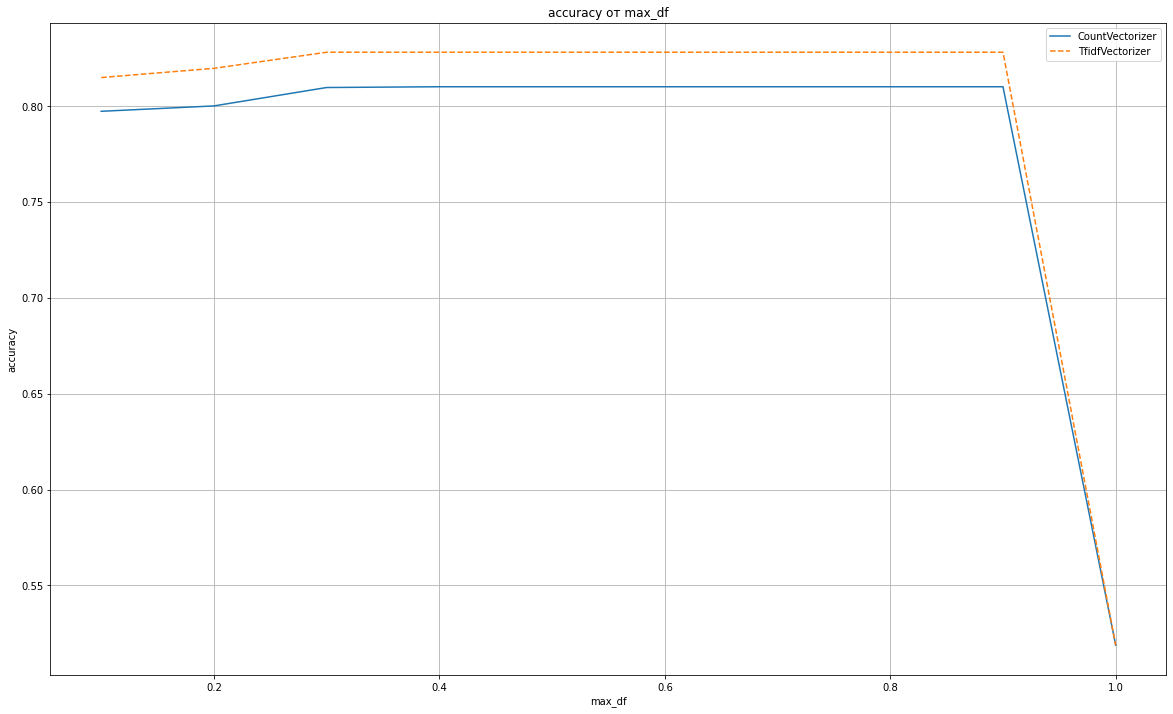

In [24]:
plt.figure(figsize=(20,12))

plt.plot(max_df, result_max_df['CV'], '-', label = f'CountVectorizer')
plt.plot(max_df, result_max_df['Tfidf'], '--', label = f'TfidfVectorizer')

plt.legend()
plt.grid('On')
plt.title('accuracy от max_df')
plt.xlabel('max_df')
plt.ylabel('accuracy')
plt.show()

In [25]:
result_max_feat = pd.DataFrame()
accuracy_cv = []
max_features = [100, 300, 500, 800, 1100, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

for f in max_features:
    
    count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, max_features=f)

    count_vectorizer.fit(trainDF['text'])

    xtrain_count =  count_vectorizer.transform(train_x)
    xvalid_count =  count_vectorizer.transform(valid_x)

    cv_classifier = linear_model.LogisticRegression()
    cv_classifier.fit(xtrain_count, train_y)
    predictions = cv_classifier.predict(xvalid_count)
    accuracy_cv.append(accuracy_score(valid_y, predictions))

In [26]:
accuracy_tfidf = []
for f in max_features:
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=f)

    tfidf_vectorizer.fit(trainDF['text'])

    xtrain_count =  tfidf_vectorizer.transform(train_x)
    xvalid_count =  tfidf_vectorizer.transform(valid_x)

    tfidf_classifier = linear_model.LogisticRegression()
    tfidf_classifier.fit(xtrain_count, train_y)
    predictions = tfidf_classifier.predict(xvalid_count)
    accuracy_tfidf.append(accuracy_score(valid_y, predictions))

In [27]:
result_max_feat['max_df'] = max_features
result_max_feat['CV'] = accuracy_cv
result_max_feat['Tfidf'] = accuracy_tfidf

In [28]:
result_max_feat

,max_df,CV,Tfidf
0,100,0.7532,0.7568
1,300,0.7932,0.7964
2,500,0.8084,0.8148
3,800,0.8160,0.8240
4,1100,0.8164,0.8288
5,1500,0.8216,0.8320
6,2000,0.8176,0.8364
7,2500,0.8228,0.8400
8,3000,0.8236,0.8380
9,3500,0.8232,0.8416


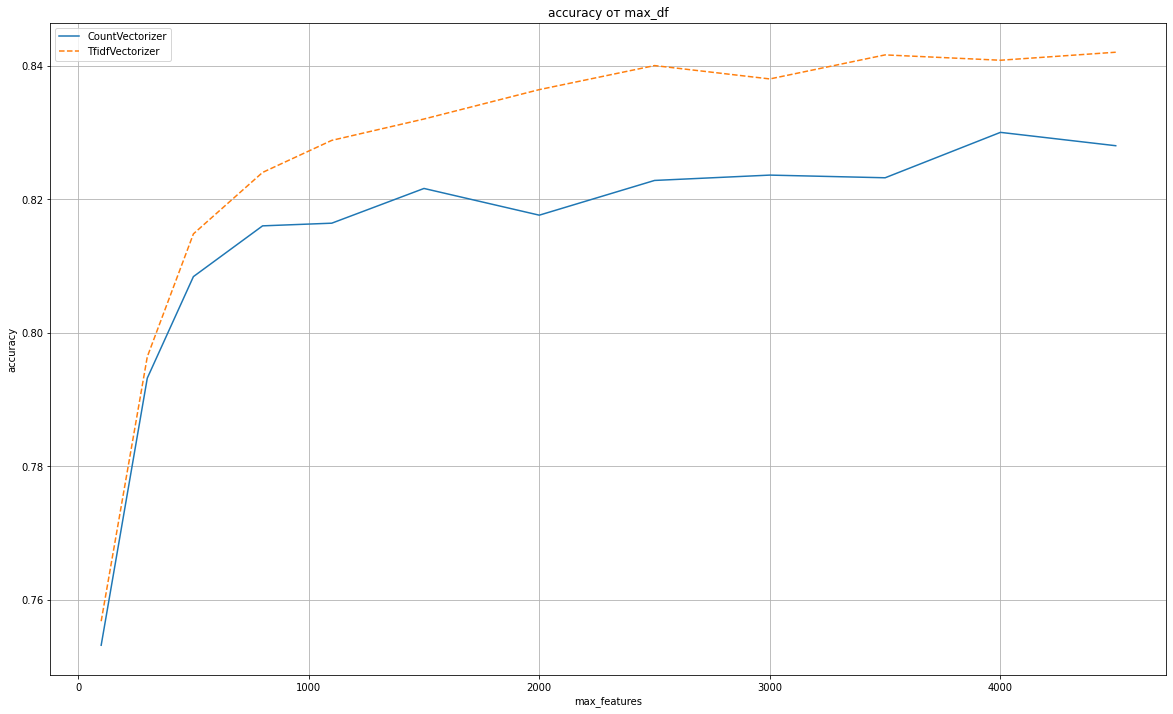

In [43]:
plt.figure(figsize=(20,12))

plt.plot(max_features, result_max_feat['CV'], '-', label = f'CountVectorizer')
plt.plot(max_features, result_max_feat['Tfidf'], '--', label = f'TfidfVectorizer')

plt.legend()
plt.grid('On')
plt.title('accuracy от max_df')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()

### Применим PCA

In [30]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)

In [32]:
xtrain_count = count_vectorizer.fit(trainDF['text'])
xtrain_count =  count_vectorizer.transform(train_x)
xtrain_count = xtrain_count.todense()
xtrain_count = PCA(n_components=1000).fit_transform(xtrain_count)

xvalid_count =  count_vectorizer.transform(valid_x)

In [33]:
cv_classifier = linear_model.LogisticRegression()
cv_classifier.fit(xtrain_count, train_y)
predictions = cv_classifier.predict(xvalid_count)
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
xtrain_count.shape

(7500, 1000)

In [35]:
accuracy.append(accuracy_score(valid_y, predictions))

### Применим TfidfVectorizer

In [36]:
xtrain_count = tfidf_vectorizer.fit(trainDF['text'])

xtrain_count =  tfidf_vectorizer.transform(train_x)
xtrain_count = xtrain_count.todense()
xtrain_count = PCA(n_components=1000).fit_transform(xtrain_count)
xvalid_count =  tfidf_vectorizer.transform(valid_x)

In [37]:
tfidf_classifier = linear_model.LogisticRegression()
tfidf_classifier.fit(xtrain_count, train_y)
predictions = tfidf_classifier.predict(xvalid_count)
predictions

array([0, 0, 1, ..., 1, 1, 0])

In [38]:
xtrain_count.shape

(7500, 1000)

In [39]:
accuracy.append(accuracy_score(valid_y, predictions))

In [40]:
accuracy

[0.81, 0.828, 0.5192, 0.5408]

In [41]:
new_result = pd.DataFrame()
new_result['vectorizer'] = ['CV', 'PCA CV', 'Tfidf', 'PCA Tfidf']
new_result['accuracy'] = accuracy

In [42]:
new_result

,vectorizer,accuracy
0,CV,0.8100
1,PCA CV,0.8280
2,Tfidf,0.5192
3,PCA Tfidf,0.5408


### Что-то с PCA вообще не пошло...